In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('dfdemocleaned.xlsx', index_col= 0)

## Parent level of education

In [4]:
pivot_parentlevelofedu = df.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH15A','ASBH15B'] )

In [5]:
pivot_parentlevelofedu

ASBH15A                    1.0                                       \
ASBH15B                    1.0         2.0         3.0         4.0    
Country     ASBH02A                                                   
Austria     No       435.659564         NaN         NaN  528.195355   
            Yes      420.646031         NaN         NaN  408.735574   
Egypt       No       404.327629  296.456540         NaN  482.771890   
            Yes      343.547233  332.637388  341.394762  349.928624   
France      No       498.387656         NaN  368.374409         NaN   
            Yes      505.283577  591.382984         NaN  489.685435   
Jordan      No       336.795693  353.869954  411.155682  303.974172   
            Yes      299.282079  320.698007  319.931453  350.161576   
Netherlands No              NaN         NaN         NaN         NaN   
            Yes      525.952762         NaN         NaN         NaN   
Sweden      No       498.779777         NaN         NaN         NaN   
            Yes      475.466987         NaN         NaN  560.624655   

ASBH15A                                                              \
ASBH15B                    5.0         6.0         7.0         9.0    
Country     ASBH02A                                                   
Austria     No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN         NaN         NaN   
Egypt       No              NaN         NaN  372.002924         NaN   
            Yes      362.071663  275.321025         NaN  317.194583   
France      No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN  442.321528         NaN   
Jordan      No       468.744458         NaN  261.597630  370.530445   
            Yes      380.395070  362.018027  347.698645  334.524347   
Netherlands No              NaN  497.568294         NaN         NaN   
            Yes             NaN         NaN         NaN         NaN   
Sweden      No              NaN         NaN         NaN  349.611278   
            Yes             NaN         NaN         NaN         NaN   

ASBH15A                                2.0                           \
ASBH15B                    10.0        1.0         2.0         3.0    
Country     ASBH02A                                                   
Austria     No              NaN         NaN  484.186130  472.363134   
            Yes             NaN  591.224610  491.087455  474.696791   
Egypt       No              NaN         NaN         NaN         NaN   
            Yes      373.473437  340.340349  359.251851  355.051628   
France      No              NaN  415.984152  482.578884  543.540855   
            Yes             NaN  465.053132  475.471547  559.233620   
Jordan      No       479.301391  356.527073  345.672318  350.577212   
            Yes      277.618539  289.773675  308.076817  326.277388   
Netherlands No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN  462.156375  452.698908   
Sweden      No              NaN  594.196354  493.267757  505.379508   
            Yes             NaN  577.202528  518.817013  575.314595   

ASBH15A                                                              \
ASBH15B                    4.0         5.0         6.0         7.0    
Country     ASBH02A                                                   
Austria     No       389.176339         NaN         NaN         NaN   
            Yes      465.956626  542.575546  594.325635  441.959557   
Egypt       No       455.213302  347.536216  343.340501         NaN   
            Yes      364.825985  304.838652  336.854821  514.854116   
France      No       554.655328         NaN  543.676189         NaN   
            Yes      486.634570         NaN  510.463941         NaN   
Jordan      No       313.215371  293.284828  481.762655  418.547075   
            Yes      307.070362  318.749128  405.056936  397.888121   
Netherlands No       

let's look at the columns that all countries have answers for - 02B - age when arrived in country and 3a speaking lang of test before school? check this!

I need to do some more cleaning if I'm getting results like this! Should not have yesses, and I guess I didn't change all results to ordinal....

# lang of test

In [6]:
pivot_langoftest = df.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH03A'] )

In [7]:
pivot_langoftest

ASBH03A                      No         Yes
Country     ASBH02A                        
Austria     No       487.644450  519.200136
            Yes      472.403527  540.354807
Egypt       No       381.043511  372.595149
            Yes      375.918329  381.073185
France      No       488.363427  502.055537
            Yes      485.858645  523.752310
Germany     No       490.241179  517.378624
            Yes      521.262006  547.694411
Iran        No       445.175716  424.108638
            Yes      362.092439  433.785116
Jordan      No       341.963226  383.829266
            Yes      343.067021  368.516474
Netherlands No       492.096739  558.039226
            Yes      523.447747  545.748518
Sweden      No       486.508932  534.645708
            Yes      520.077984  567.317763
Turkey      No       436.301444  477.771726
            Yes      472.809233  509.617613

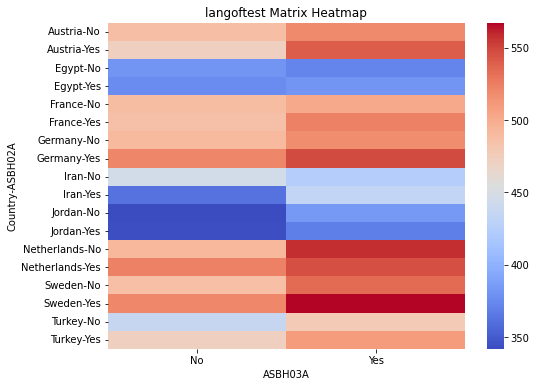

In [8]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_langoftest, annot=False, cmap='coolwarm')

# Add a title
plt.title('langoftest Matrix Heatmap')

# Show the plot
plt.show()

Again I want to put the yesses on top of the nos. And do I want to arange the order?

Let's do a pivot adding the lang of test column to the index. 

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [9]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    38168
0.0     1090
3.0      835
6.0      477
8.0      240
Name: MINAGEARRIVAL, dtype: int64

In [10]:
df['MINAGEARRIVAL'] = df['MINAGEARRIVAL'].fillna('NA')

In [11]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NA     38168
0.0     1090
3.0      835
6.0      477
8.0      240
Name: MINAGEARRIVAL, dtype: int64

In [12]:
pivot_minage = df.pivot_table(values='avgscore', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [13]:
pivot_minage

MINAGEARRIVAL,0.0,3.0,6.0,8.0,NA
Country,,,,,
Austria,524.691549,503.023525,482.467533,472.698753,535.931404
Egypt,382.087467,360.526565,353.167965,359.496124,380.234984
France,514.789067,500.251059,487.735549,449.952812,522.219901
Germany,521.986539,490.961791,485.084177,517.617192,547.194744
Iran,415.102270,429.928154,450.368901,421.684960,423.246228
Jordan,380.605999,385.670465,381.076742,372.786823,368.776349
Netherlands,546.704431,510.434272,532.347393,529.268667,544.917812
Sweden,547.588860,506.832225,496.426190,486.933911,565.960709
Turkey,460.361803,439.893039,471.000542,446.103548,507.296871


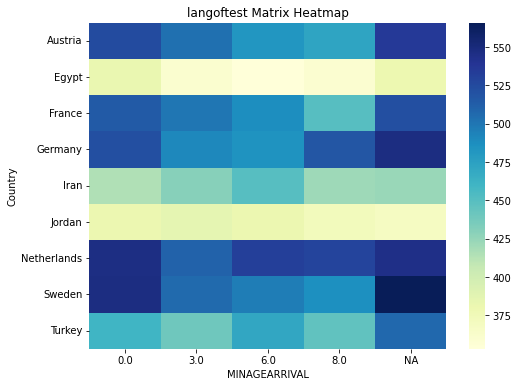

In [14]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_minage, annot=False, cmap='YlGnBu')

# Add a title
plt.title('langoftest Matrix Heatmap')

# Show the plot
plt.show()

## want to do experiment with crosstab - adding more columns

Rearrange order of columns -put asdage with other demographic    

**I want to get back all the asbg10 ones - they are useful** 
## I can use the differing demographic data to see if there is that affects experience in schools and reading scores. 
Should also compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant